In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


#  Reading The Dataset

In [2]:
df=pd.read_csv("LoanRiskScore.csv")
df['LoanRiskScore'].fillna( df['LoanRiskScore'].median() , inplace=True)

In [ ]:
df.head()

,ListingNumber,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,...,BankcardUtilization,AvailableBankcardCredit,TotalTrades,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanNumber,LoanOriginalAmount,LoanRiskScore
0,193129,C,36,Completed,0.16516,0.1580,0,CO,Self-employed,2.0,...,0.00,1500.0,11.0,0.17,"$25,000-49,999",3083.333333,NaN,19141,9425,6.504759
1,1209647,NaN,36,Current,0.12016,0.0920,2,CO,Employed,44.0,...,0.21,10266.0,29.0,0.18,"$50,000-74,999",6125.000000,NaN,134815,10000,7.761652
2,81716,HR,36,Completed,0.28269,0.2750,0,GA,Not available,NaN,...,NaN,NaN,NaN,0.06,Not displayed,2083.333333,NaN,6466,3001,6.504759
3,658116,NaN,36,Current,0.12528,0.0974,16,GA,Employed,113.0,...,0.04,30754.0,26.0,0.15,"$25,000-49,999",2875.000000,NaN,77296,10000,9.731209
4,909464,NaN,36,Current,0.24614,0.2085,2,MN,Employed,44.0,...,0.81,695.0,39.0,0.26,"$100,000+",9583.333333,11.0,102670,15000,4.539453


# Gaining Some Descriptive Statistics Insights From The Data

In [ ]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ListingCategory,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanNumber,LoanOriginalAmount,LoanRiskScore
count,1.079370e+05,107937.000000,107915.000000,107937.000000,107937.000000,100696.000000,107373.000000,107373.000000,1.007170e+05,100717.000000,100775.000000,100775.000000,99841.000000,1.079370e+05,20887.000000,107937.000000,107937.000000,107937.000000
mean,6.279231e+05,40.840157,0.218788,0.192739,2.769875,96.139211,685.583527,704.583527,1.761505e+04,0.561267,11225.250082,23.230474,0.275532,5.608054e+03,22.968497,69453.111815,8338.762019,6.483959
std,3.282647e+05,10.438412,0.080382,0.074824,3.994086,94.501587,66.386934,66.386934,3.297155e+04,0.317940,19927.994073,11.867332,0.547660,7.532267e+03,19.298374,38952.172785,6246.899689,2.141326
min,5.000000e+00,12.000000,0.006530,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,1000.000000,1.139882
25%,4.009010e+05,36.000000,0.156290,0.134000,1.000000,26.000000,660.000000,679.000000,3.121000e+03,0.310000,879.000000,15.000000,0.140000,3.200000e+03,9.000000,37340.000000,4000.000000,5.278188
50%,6.006550e+05,36.000000,0.209330,0.184000,1.000000,67.000000,680.000000,699.000000,8.543000e+03,0.600000,4097.000000,22.000000,0.220000,4.666667e+03,16.000000,68612.000000,6500.000000,6.504759
75%,8.929370e+05,36.000000,0.283700,0.250000,3.000000,137.000000,720.000000,739.000000,1.951000e+04,0.840000,13166.500000,30.000000,0.320000,6.820000e+03,33.000000,101918.000000,12000.000000,7.629674
max,1.255725e+06,60.000000,0.512290,0.497500,20.000000,755.000000,880.000000,899.000000,1.435667e+06,5.950000,646285.000000,126.000000,10.010000,1.750003e+06,141.000000,136486.000000,35000.000000,11.870941


# Identifying The Data Types And The Missing Values of All The Columns.

In [ ]:
df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107937 entries, 0 to 107936
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingNumber               107937 non-null  int64  
 1   CreditGrade                 27422 non-null   object 
 2   Term                        107937 non-null  int64  
 3   LoanStatus                  107937 non-null  object 
 4   BorrowerAPR                 107915 non-null  float64
 5   BorrowerRate                107937 non-null  float64
 6   ListingCategory             107937 non-null  int64  
 7   BorrowerState               102715 non-null  object 
 8   EmploymentStatus            105806 non-null  object 
 9   EmploymentStatusDuration    100696 non-null  float64
 10  IsBorrowerHomeowner         107937 non-null  bool   
 11  CreditScoreRangeLower       107373 non-null  float64
 12  CreditScoreRangeUpper       107373 non-null  float64
 13  RevolvingCredi

# EDA

In [ ]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ListingNumber,Term,BorrowerAPR,BorrowerRate,ListingCategory,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanNumber,LoanOriginalAmount,LoanRiskScore
ListingNumber,1.000000,0.320097,-0.031345,-0.114307,0.127252,0.155236,0.076281,0.269168,0.269168,0.056973,0.086506,0.036669,0.135032,-0.041207,0.075273,0.132593,0.995100,0.339694,-0.055039
Term,0.320097,1.000000,-0.010764,0.020325,0.003975,0.081514,0.085400,0.126349,0.126349,0.025497,0.031825,0.015175,0.079243,-0.014538,0.027875,0.000275,0.335745,0.338805,0.027063
BorrowerAPR,-0.031345,-0.010764,1.000000,0.989856,0.133657,-0.007798,-0.132070,-0.429779,-0.429779,-0.057917,0.261244,-0.347827,-0.041832,0.056658,-0.081216,0.034176,-0.036124,-0.323022,-0.603345
BorrowerRate,-0.114307,0.020325,0.989856,1.000000,0.104040,-0.019139,-0.133654,-0.461593,-0.461593,-0.059011,0.255189,-0.342838,-0.048196,0.063231,-0.087742,0.021599,-0.118653,-0.329179,-0.589432
ListingCategory,0.127252,0.003975,0.133657,0.104040,1.000000,-0.004512,-0.038573,0.101984,0.101984,-0.050284,-0.086924,-0.031458,-0.066344,-0.042994,0.001037,-0.003024,0.123959,-0.127725,-0.016463
EmploymentStatusDuration,0.155236,0.081514,-0.007798,-0.019139,-0.004512,1.000000,0.171524,0.080055,0.080055,0.118506,0.082242,0.050768,0.217411,-0.011999,0.068847,0.069250,0.158277,0.097208,-0.005299
IsBorrowerHomeowner,0.076281,0.085400,-0.132070,-0.133654,-0.038573,0.171524,1.000000,0.293326,0.293326,0.224671,0.085833,0.141548,0.317456,0.000510,0.139912,0.002550,0.075525,0.206650,0.059707
CreditScoreRangeLower,0.269168,0.126349,-0.429779,-0.461593,0.101984,0.080055,0.293326,1.000000,1.000000,0.087675,-0.405479,0.452567,0.138875,-0.013508,0.106929,-0.026369,0.264439,0.341175,0.234984
CreditScoreRangeUpper,0.269168,0.126349,-0.429779,-0.461593,0.101984,0.080055,0.293326,1.000000,1.000000,0.087675,-0.405479,0.452567,0.138875,-0.013508,0.106929,-0.026369,0.264439,0.341175,0.234984
RevolvingCreditBalance,0.056973,0.025497,-0.057917,-0.059011,-0.050284,0.118506,0.224671,0.087675,0.087675,1.000000,0.246774,0.239700,0.283885,0.038433,0.194814,-0.000724,0.056690,0.190277,0.037971


<ipython-input-45-a29919c72b01>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


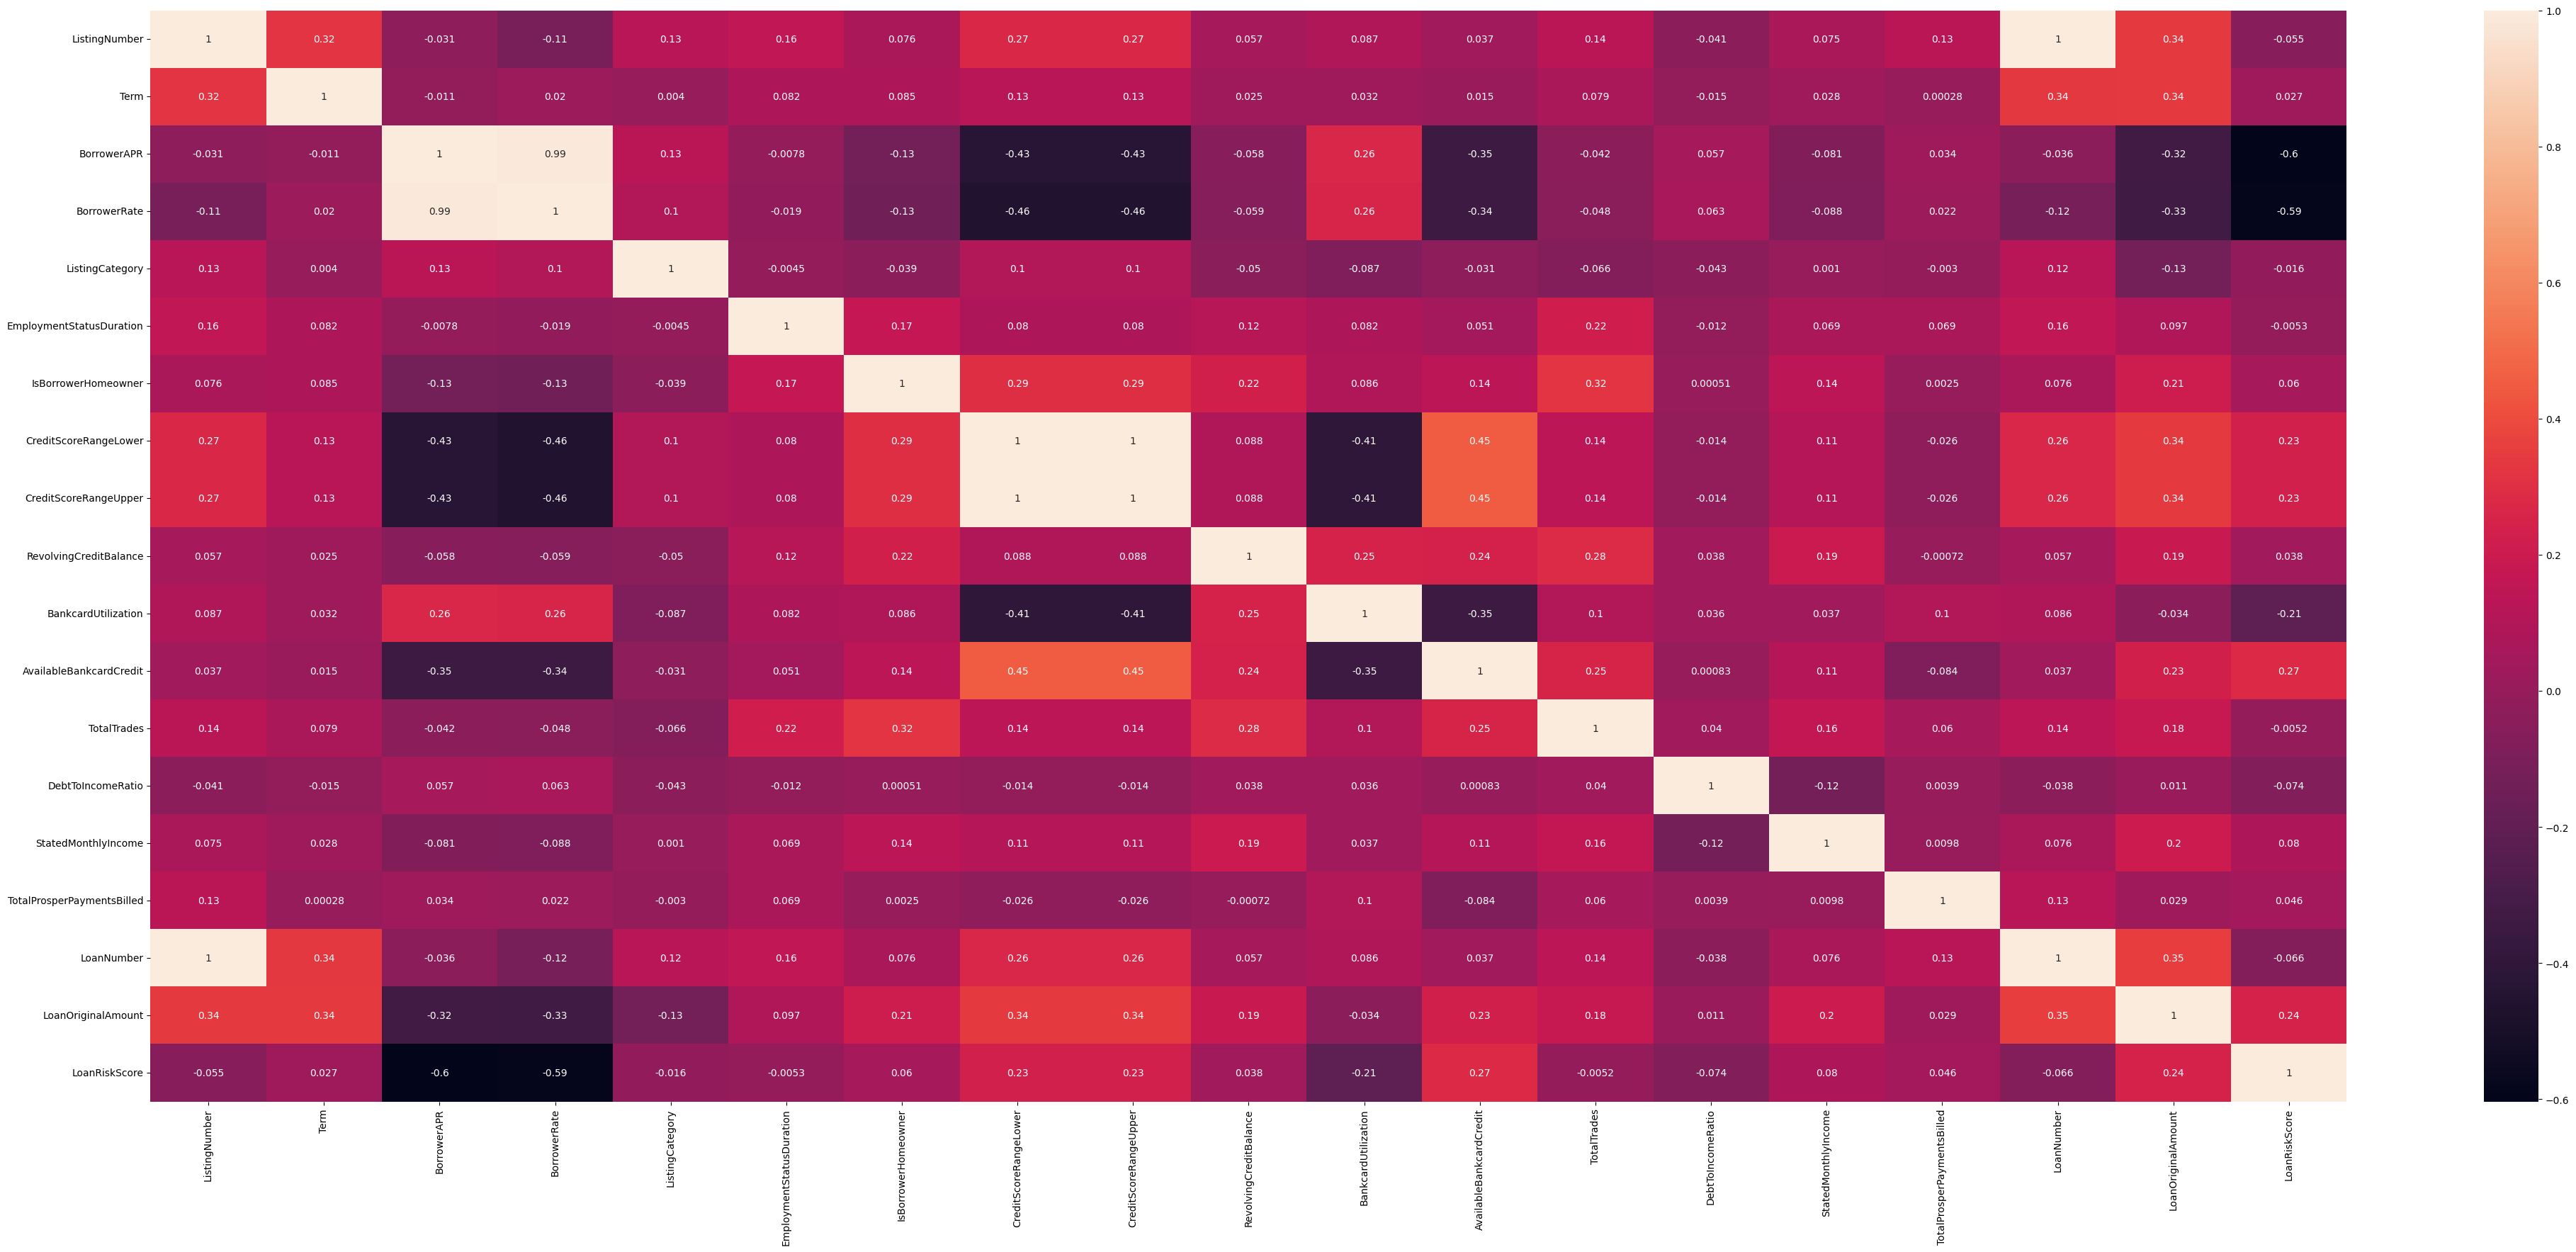

In [ ]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (50,50)
plt.show()

array([[<Axes: xlabel='LoanRiskScore', ylabel='LoanRiskScore'>,
        <Axes: xlabel='BorrowerAPR', ylabel='LoanRiskScore'>,
        <Axes: xlabel='BorrowerRate', ylabel='LoanRiskScore'>,
        <Axes: xlabel='EmploymentStatusDuration', ylabel='LoanRiskScore'>,
        <Axes: xlabel='CreditScoreRangeLower', ylabel='LoanRiskScore'>,
        <Axes: xlabel='CreditScoreRangeUpper', ylabel='LoanRiskScore'>,
        <Axes: xlabel='AvailableBankcardCredit', ylabel='LoanRiskScore'>,
        <Axes: xlabel='StatedMonthlyIncome', ylabel='LoanRiskScore'>,
        <Axes: xlabel='TotalProsperPaymentsBilled', ylabel='LoanRiskScore'>,
        <Axes: xlabel='LoanOriginalAmount', ylabel='LoanRiskScore'>,
        <Axes: xlabel='ListingCategory', ylabel='LoanRiskScore'>],
       [<Axes: xlabel='LoanRiskScore', ylabel='BorrowerAPR'>,
        <Axes: xlabel='BorrowerAPR', ylabel='BorrowerAPR'>,
        <Axes: xlabel='BorrowerRate', ylabel='BorrowerAPR'>,
        <Axes: xlabel='EmploymentStatusDuration', yl

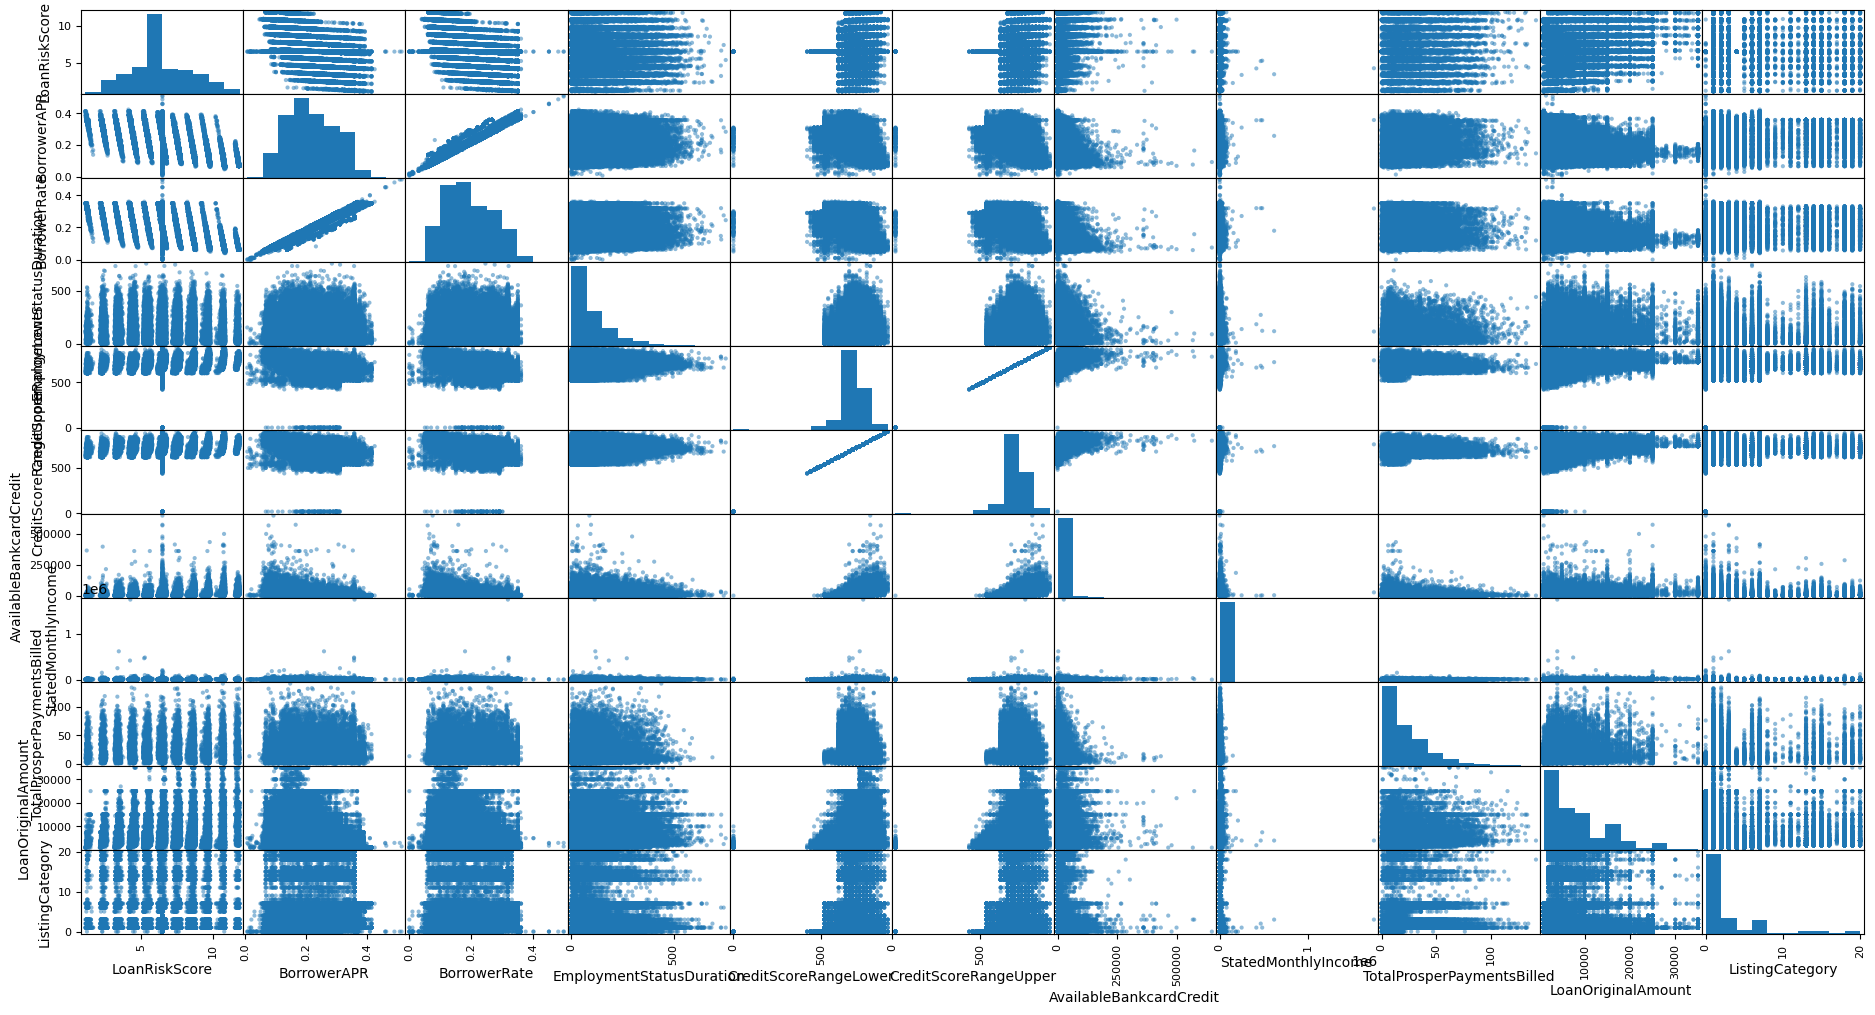

In [ ]:
imp_attributes = ['LoanRiskScore','BorrowerAPR','BorrowerRate','EmploymentStatusDuration','CreditScoreRangeLower','CreditScoreRangeUpper','AvailableBankcardCredit','StatedMonthlyIncome','TotalProsperPaymentsBilled','LoanOriginalAmount','ListingCategory']
from pandas.plotting import scatter_matrix
scatter_matrix(df[imp_attributes], figsize=(23, 12))

<Axes: xlabel='ListingCategory', ylabel='LoanRiskScore'>

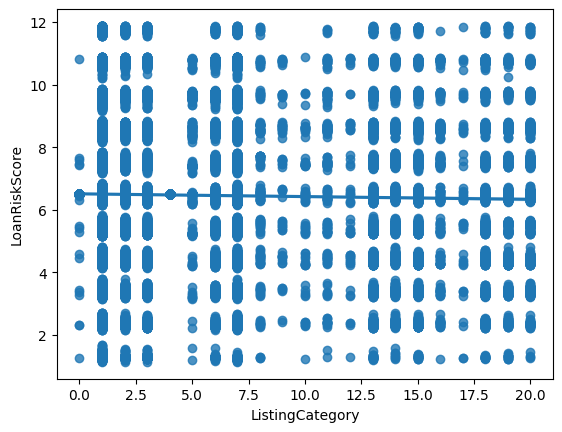

In [ ]:
sn.regplot(x=df['ListingCategory'],y=df['LoanRiskScore'])

<Axes: xlabel='LoanOriginalAmount', ylabel='LoanRiskScore'>

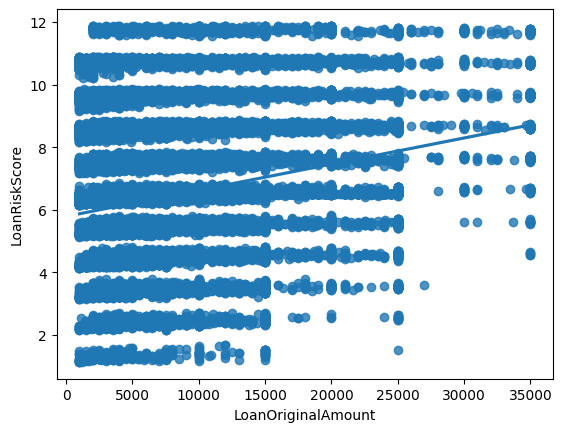

In [ ]:

sn.regplot(x=df['LoanOriginalAmount'],y=df['LoanRiskScore'])

In [ ]:
df['EmploymentStatus'].value_counts()

Employed         63765
Full-time        24959
Self-employed     5826
Not available     5087
Other             3599
Part-time         1033
Not employed       780
Retired            757
Name: EmploymentStatus, dtype: int64

In [3]:
df['EmploymentStatus'].replace('Not available',np.nan,inplace = True)
df['EmploymentStatus'].value_counts()

Employed         63765
Full-time        24959
Self-employed     5826
Other             3599
Part-time         1033
Not employed       780
Retired            757
Name: EmploymentStatus, dtype: int64

In [ ]:
df['IncomeRange'].value_counts()

$25,000-49,999    30527
$50,000-74,999    29417
$100,000+         16423
$75,000-99,999    15981
Not displayed      7348
$1-24,999          6899
Not employed        752
$0                  590
Name: IncomeRange, dtype: int64

In [4]:
df['IncomeRange'].replace('Not displayed',np.nan,inplace = True)
df['IncomeRange'].value_counts()

$25,000-49,999    30527
$50,000-74,999    29417
$100,000+         16423
$75,000-99,999    15981
$1-24,999          6899
Not employed        752
$0                  590
Name: IncomeRange, dtype: int64

# Extracting the Numerical Features

In [ ]:
conData=df.select_dtypes(include= ['float64', 'int64'])
conData.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ListingCategory,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanNumber,LoanOriginalAmount,LoanRiskScore
0,193129,36,0.16516,0.1580,0,2.0,640.0,659.0,0.0,0.00,1500.0,11.0,0.17,3083.333333,NaN,19141,9425,6.504759
1,1209647,36,0.12016,0.0920,2,44.0,680.0,699.0,3989.0,0.21,10266.0,29.0,0.18,6125.000000,NaN,134815,10000,7.761652
2,81716,36,0.28269,0.2750,0,NaN,480.0,499.0,NaN,NaN,NaN,NaN,0.06,2083.333333,NaN,6466,3001,6.504759
3,658116,36,0.12528,0.0974,16,113.0,800.0,819.0,1444.0,0.04,30754.0,26.0,0.15,2875.000000,NaN,77296,10000,9.731209
4,909464,36,0.24614,0.2085,2,44.0,680.0,699.0,6193.0,0.81,695.0,39.0,0.26,9583.333333,11.0,102670,15000,4.539453


# Checking The Distribution For The Numerical Features and Handling Their Outliers


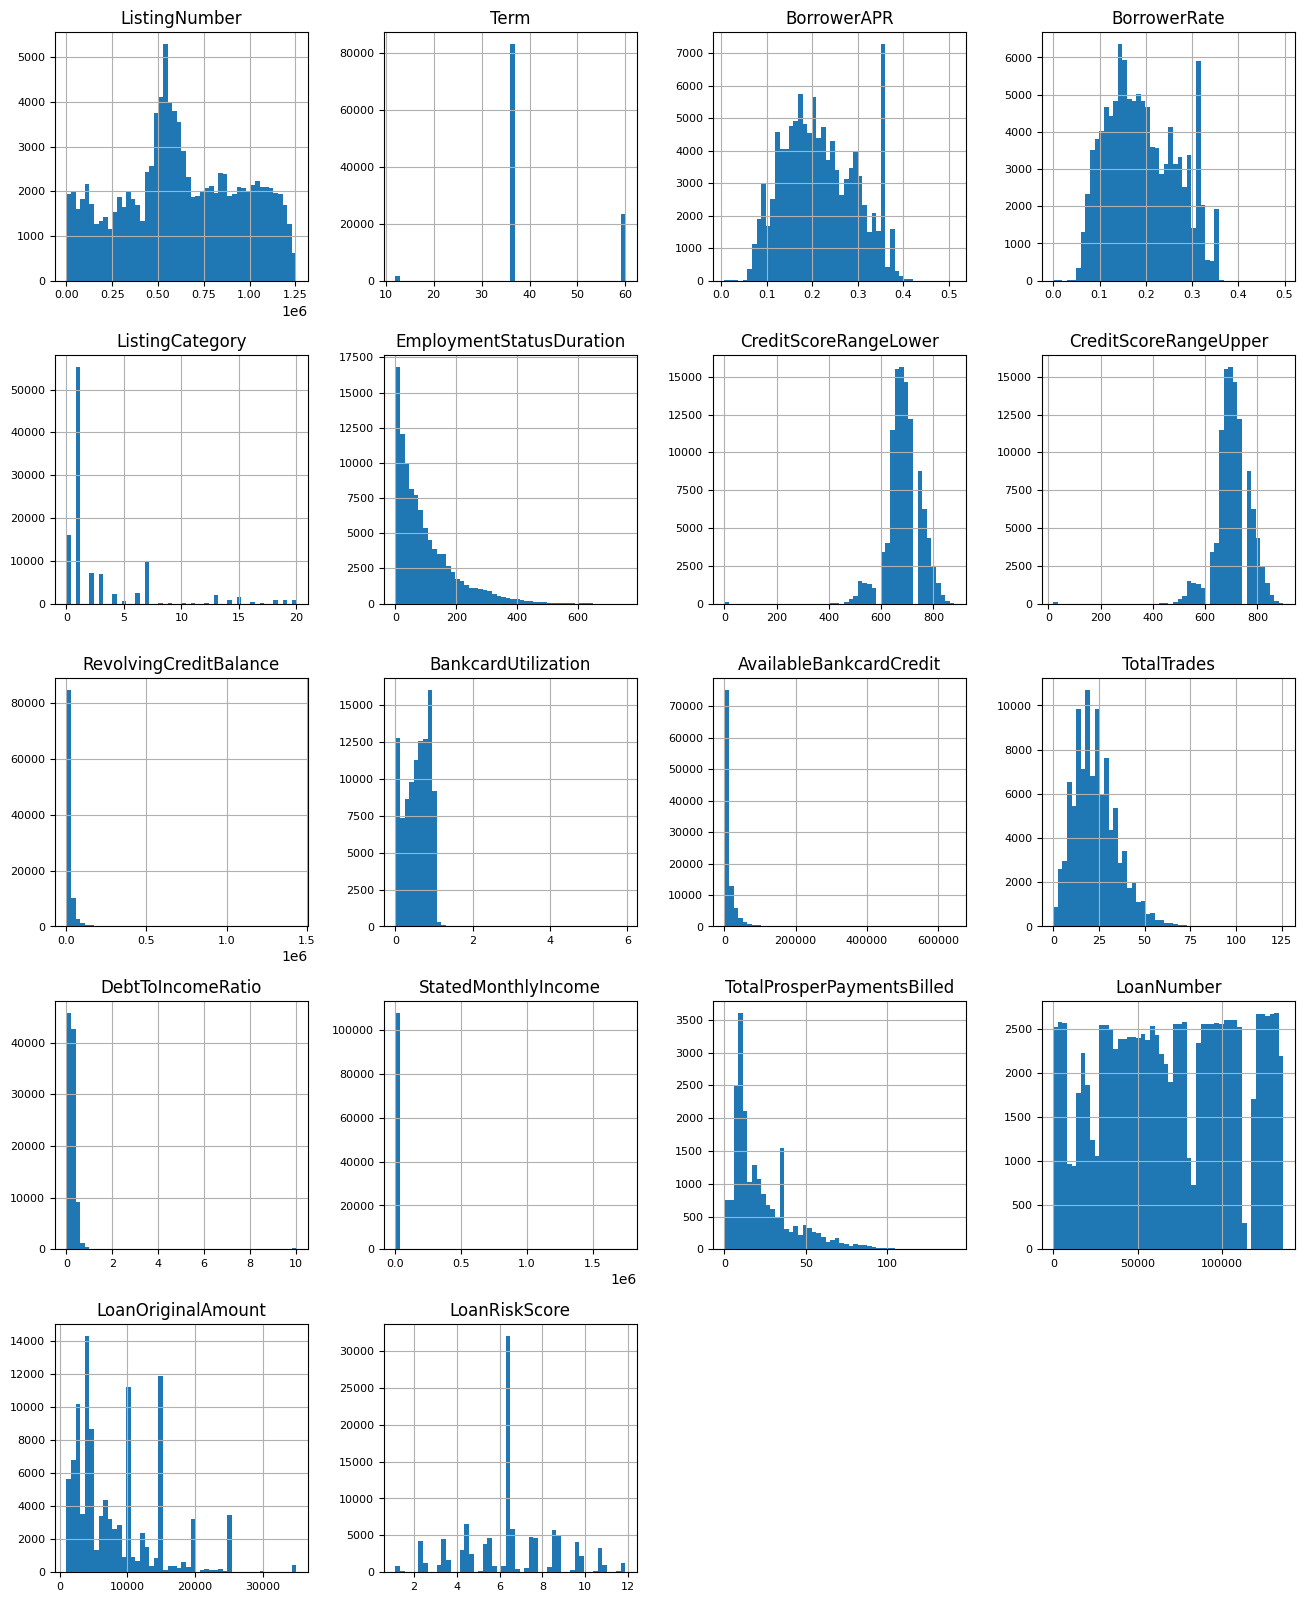

In [ ]:
conData.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


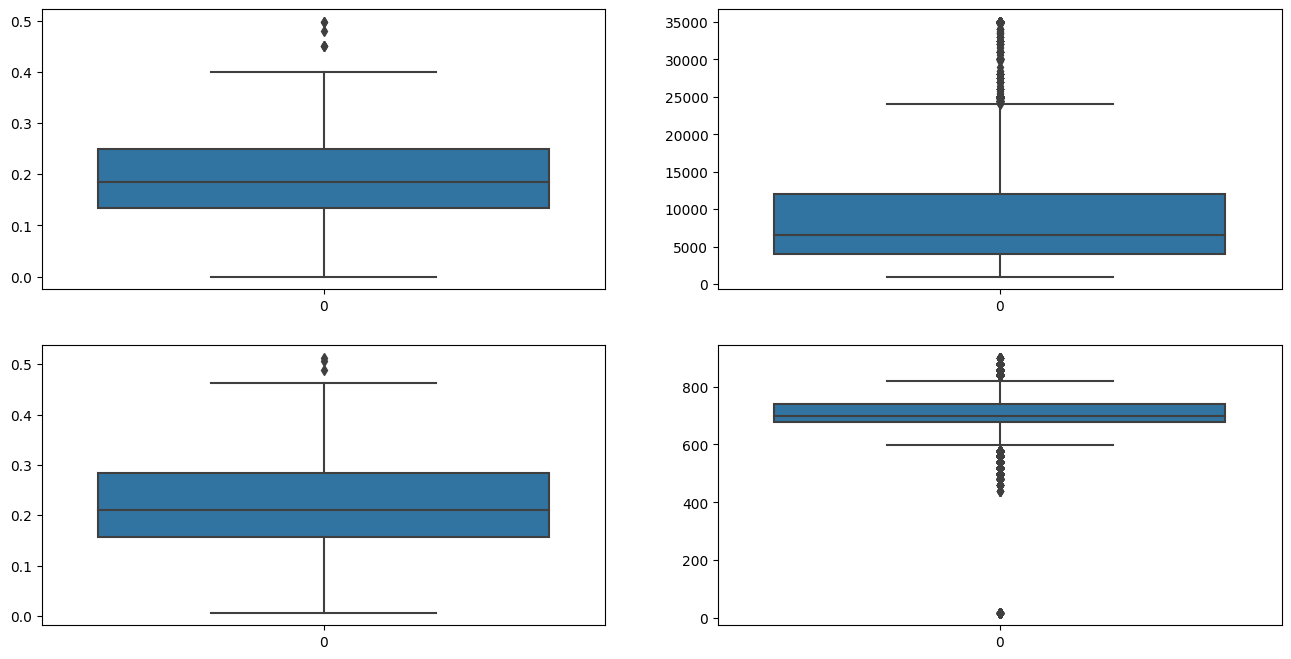

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sn.boxplot(df['BorrowerRate'])
plt.subplot(2,2,2)
sn.boxplot(df['LoanOriginalAmount'])
plt.subplot(2,2,3)
sn.boxplot(df['BorrowerAPR'])
plt.subplot(2,2,4)
sn.boxplot(df['CreditScoreRangeUpper'])
plt.show()



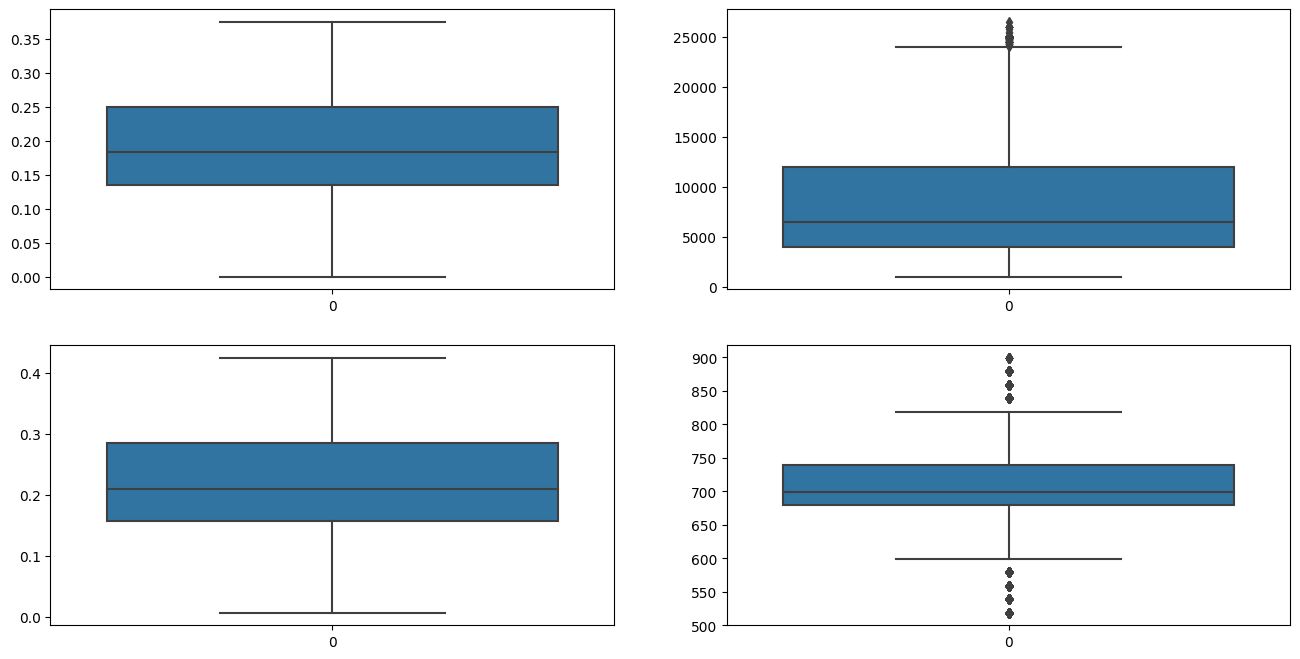

In [ ]:
arr1 = np.where(df['BorrowerRate']>=0.4)[0]
arr2 = np.where(df['CreditScoreRangeUpper']<=500)[0]
arr3 = np.where(df['LoanOriginalAmount']>=27000)[0]

arr=np.unique(np.concatenate((arr1,arr2,arr3)))
df.drop(index=arr, inplace=True)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sn.boxplot(df['BorrowerRate'])
plt.subplot(2,2,2)
sn.boxplot(df['LoanOriginalAmount'])
plt.subplot(2,2,3)
sn.boxplot(df['BorrowerAPR'])
plt.subplot(2,2,4)
sn.boxplot(df['CreditScoreRangeUpper'])
plt.show()



# Extracting The Categorical Features and Doing some EDA on Them

In [ ]:

categData=df.select_dtypes(include='object')
categData

,CreditGrade,LoanStatus,BorrowerState,EmploymentStatus,IncomeRange
0,C,Completed,CO,Self-employed,"$25,000-49,999"
1,NaN,Current,CO,Employed,"$50,000-74,999"
2,HR,Completed,GA,NaN,NaN
3,NaN,Current,GA,Employed,"$25,000-49,999"
4,NaN,Current,MN,Employed,"$100,000+"
...,...,...,...,...,...
107932,HR,Chargedoff,UT,Full-time,"$75,000-99,999"
107933,C,Completed,TX,Part-time,"$1-24,999"
107934,NaN,Current,FL,Employed,"$50,000-74,999"
107935,HR,Completed,NaN,Full-time,"$25,000-49,999"


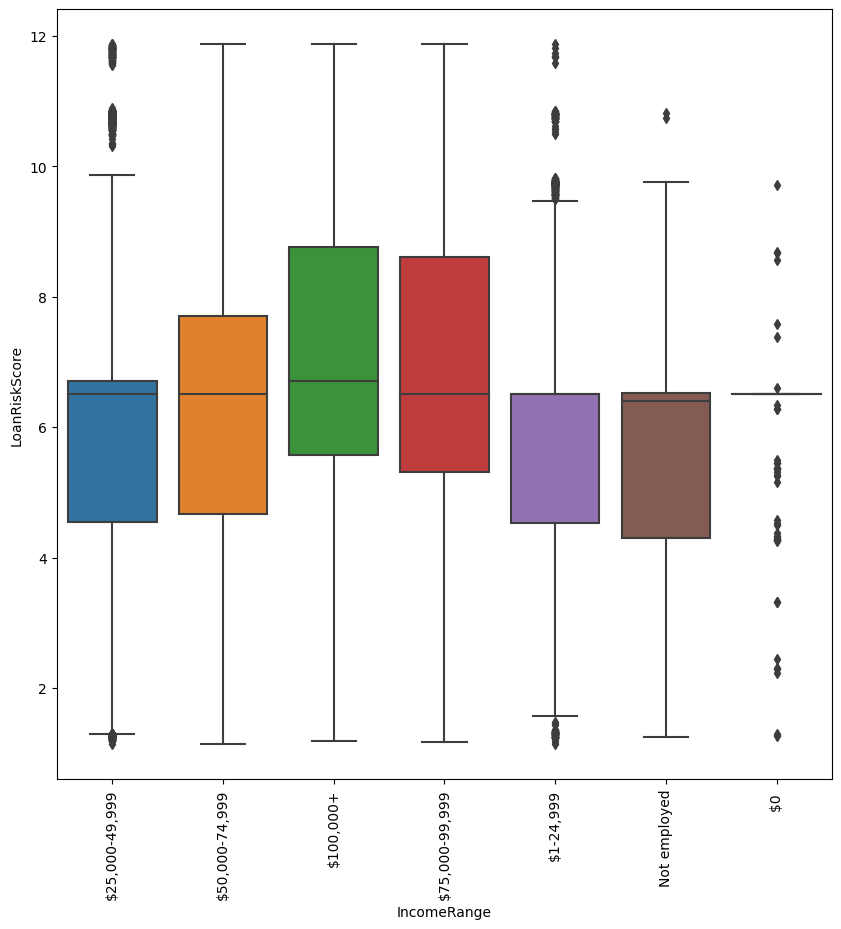

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sn.boxplot(x=df['IncomeRange'],y=df['LoanRiskScore'])
plt.xticks(rotation = 90)
plt.show()



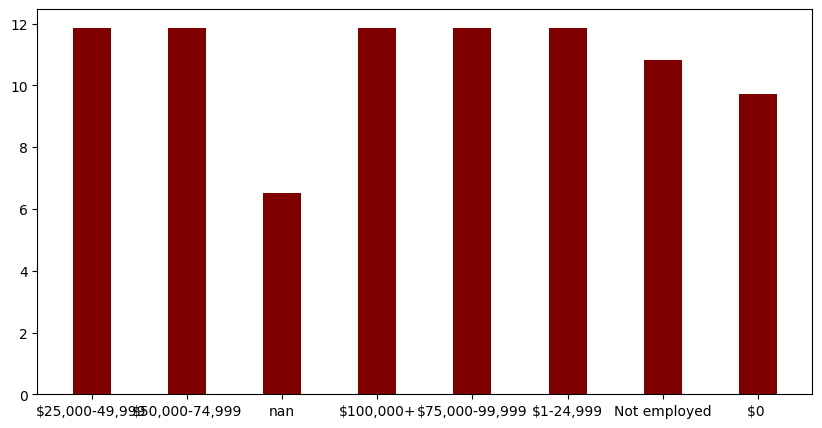

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 5))
plt.bar(df['IncomeRange'].astype('str'), df['LoanRiskScore'], color ='maroon',
        width = 0.4)
plt.show()


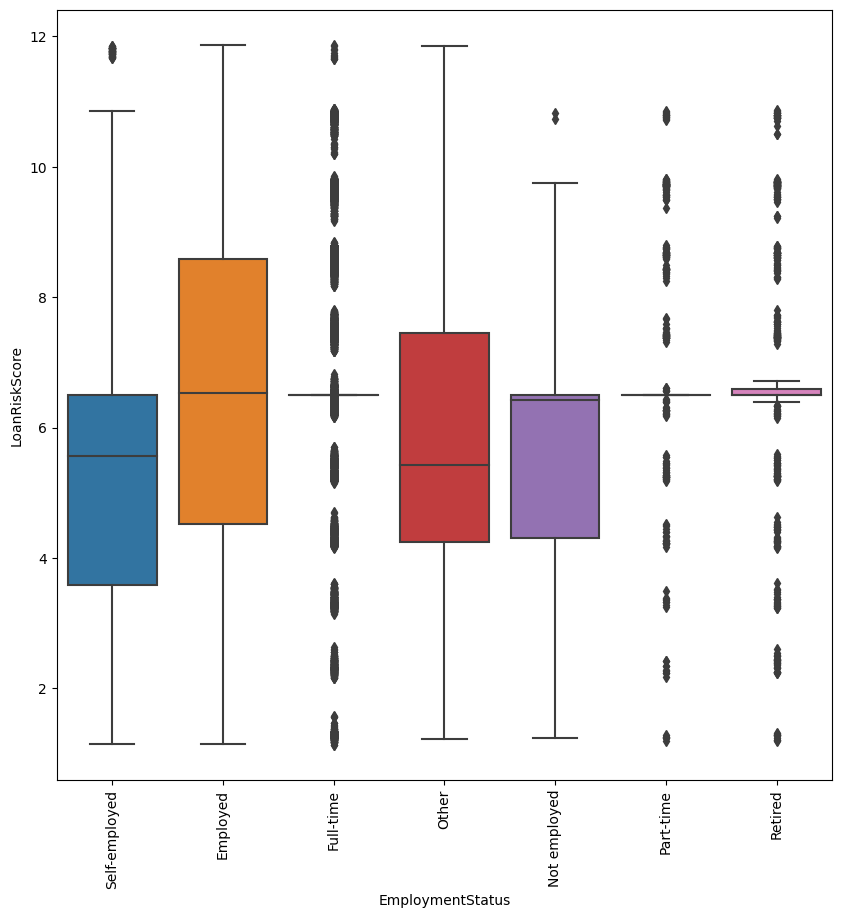

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sn.boxplot(x=df['EmploymentStatus'],y=df['LoanRiskScore'])
plt.xticks(rotation = 90)
plt.show()


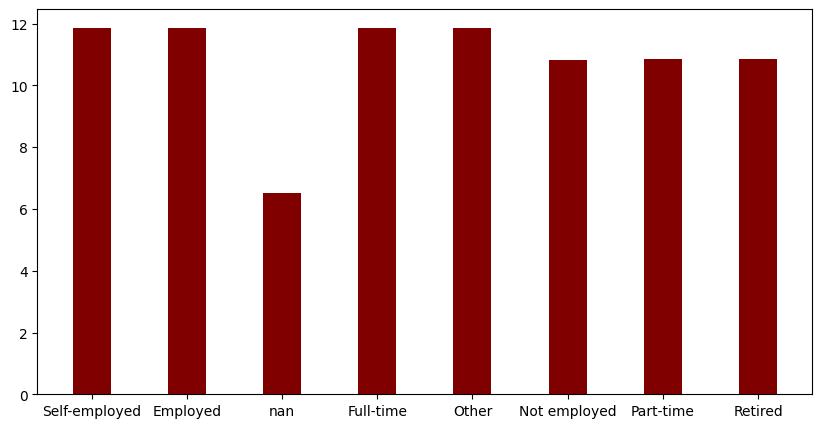

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 5))
plt.bar(df['EmploymentStatus'].astype('str'), df['LoanRiskScore'], color ='maroon',
        width = 0.4)
plt.show()


# Selecting The Important Features and Splitting The Data to Train and Test Sets

In [5]:
X=df.drop(['LoanRiskScore'],axis=1)
Y=df['LoanRiskScore']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42)
importantFeatures=['Term','LoanStatus','BorrowerAPR','BorrowerRate','EmploymentStatus','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','BankcardUtilization',
                   'AvailableBankcardCredit','DebtToIncomeRatio','IncomeRange','StatedMonthlyIncome','LoanOriginalAmount']
X_train=X_train[importantFeatures]
X_test=X_test[importantFeatures]


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74673 entries, 89038 to 15993
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Term                     74673 non-null  int64  
 1   LoanStatus               74673 non-null  object 
 2   BorrowerAPR              74656 non-null  float64
 3   BorrowerRate             74673 non-null  float64
 4   EmploymentStatus         70105 non-null  object 
 5   IsBorrowerHomeowner      74673 non-null  bool   
 6   CreditScoreRangeLower    74295 non-null  float64
 7   CreditScoreRangeUpper    74295 non-null  float64
 8   BankcardUtilization      70105 non-null  float64
 9   AvailableBankcardCredit  70141 non-null  float64
 10  DebtToIncomeRatio        69028 non-null  float64
 11  IncomeRange              70012 non-null  object 
 12  StatedMonthlyIncome      74673 non-null  float64
 13  LoanOriginalAmount       74673 non-null  int64  
dtypes: bool(1), float6

In [ ]:
X_train

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,BankcardUtilization,AvailableBankcardCredit,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
11385,36,Current,0.28544,0.2469,Employed,False,640.0,659.0,0.97,92.0,0.09,"$25,000-49,999",4131.083333,4200
66241,60,Current,0.24302,0.2181,Employed,True,720.0,739.0,0.59,2700.0,0.64,"$1-24,999",1250.000000,15000
22209,60,Current,0.18852,0.1649,Employed,True,680.0,699.0,0.26,9530.0,0.13,"$75,000-99,999",7319.000000,25000
58345,60,Current,0.14965,0.1269,Employed,True,700.0,719.0,0.68,4052.0,0.39,"$25,000-49,999",3333.333333,6500
68065,36,Current,0.23530,0.1979,Employed,False,680.0,699.0,0.88,1559.0,0.59,"$25,000-49,999",2583.333333,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,60,Current,0.32958,0.3049,Employed,False,720.0,739.0,0.75,297.0,0.17,"$25,000-49,999",2096.666667,10000
76820,36,Current,0.20564,0.1764,Employed,True,700.0,719.0,0.93,2660.0,0.13,"$25,000-49,999",3000.000000,5000
103694,36,Current,0.11563,0.0879,Employed,False,680.0,699.0,0.19,21800.0,0.19,"$75,000-99,999",7858.333333,7500
860,36,Current,0.17192,0.1359,Employed,False,740.0,759.0,0.00,2000.0,0.20,"$25,000-49,999",3166.666667,7000


# Handling Missing Values, Categorical Values, Normalization Using Pipeline  and Imuters

In [6]:
conDataNames=X_train.select_dtypes(include= ['float64', 'int64']).columns
categDataNames=X_train.select_dtypes(include='object').columns


In [7]:
numeric_transformer = Pipeline(steps=[
   ('imputer', KNNImputer(n_neighbors=3, weights="uniform")),
   ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='most_frequent')),
   ('onehot', OrdinalEncoder())])

preprocessor = ColumnTransformer(
   remainder = 'passthrough',
   transformers=[
       ('numeric', numeric_transformer, conDataNames),
       ('categorical', categorical_transformer, categDataNames),
])

transform = Pipeline(
   steps=[
       ("processing", preprocessor),

   ]
)

In [8]:
X_train=transform.fit_transform(X_train)


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.464014,-1.202504,-1.037602,0.875415,0.875415,-0.743764,0.318986,-0.109312,-0.501416,0.299669,2.0,1.0,3.0,0.0
1,-0.464014,0.883209,0.781907,-0.445578,-0.445578,-1.792222,-0.558453,-0.330599,-0.509220,-0.372560,2.0,0.0,3.0,0.0
2,1.831252,-0.222433,-0.210066,1.535912,1.535912,-0.839078,1.514076,-0.247616,0.520820,2.820529,3.0,0.0,2.0,1.0
3,-0.464014,-0.689530,-0.871827,0.545167,0.545167,1.035437,-0.176677,-0.081651,-0.446793,0.299669,3.0,6.0,3.0,1.0
4,-0.464014,-0.750575,-0.838405,0.875415,0.875415,1.130751,-0.526698,0.015162,-0.509220,0.299669,3.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74668,-0.464014,-0.565078,-0.994821,0.875415,0.875415,-0.616678,0.211974,-0.246961,-0.649679,-1.212847,2.0,0.0,3.0,0.0
74669,-0.464014,1.731494,1.672277,-0.445578,-0.445578,1.353151,-0.558043,-0.330599,-0.509220,-1.044789,2.0,0.0,3.0,0.0
74670,-0.464014,1.513673,1.443669,-0.445578,-0.445578,1.257837,-0.515772,0.098145,0.115047,-0.708675,3.0,0.0,4.0,1.0
74671,-0.464014,1.213049,1.128162,0.214919,0.214919,-0.807307,-0.514694,-0.178464,0.083834,-0.876732,2.0,0.0,4.0,1.0


In [9]:
X_test=transform.transform(X_test)

# Trying Different ML Models and Tuning Them

In [16]:

n=[5,20,30,40,50,60,70,80,90,100,120,140,150]
rec1=[]
for i in n:
  model= RandomForestRegressor(n_estimators = i , random_state = 0)
  model.fit(X_train,pd.DataFrame(y_train))
  p_test=model.predict(pd.DataFrame(X_test))
  rec1.append(r2_score(y_test,p_test))


<ipython-input-16-4f9a2b839e3a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,pd.DataFrame(y_train))
<ipython-input-16-4f9a2b839e3a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,pd.DataFrame(y_train))
<ipython-input-16-4f9a2b839e3a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,pd.DataFrame(y_train))
<ipython-input-16-4f9a2b839e3a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,pd.DataFrame(y_train))
<ipython-input-16-4f9a2b839e3a>:5: DataConversionWarning: A column-v

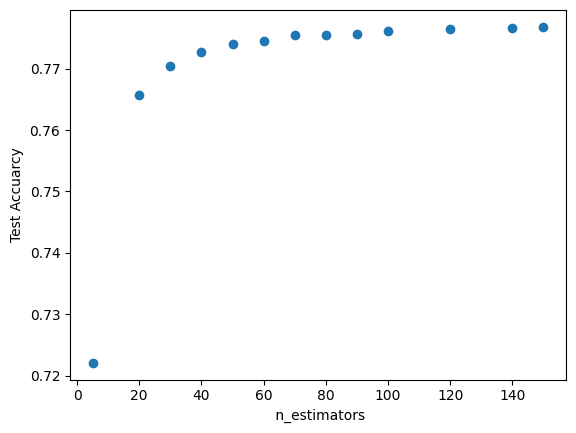

In [31]:
plt.scatter(n, rec1)
plt.xlabel(" n_estimators")
plt.ylabel("Test Accuarcy")
plt.show()

In [40]:
n2=[0.0001,0.001,0.01,0.1,1,10]
rec2=[]
for i in n2:
  model= Ridge(alpha=i)
  model.fit(X_train,y_train)
  p_test=model.predict(X_test)
  rec2.append(r2_score(y_test,p_test))

In [41]:
rec2

[0.39259351703949386,
 0.39259351691740363,
 0.39259351569526146,
 0.39259350334994736,
 0.3925933675483245,
 0.3925908145417656]